# Lesson 1: Dogs vs. Cats
Our first lesson! Much of this lesson was setup and getting stuff up and running on AWS. I chose to do the manual approach and run it locally. I spent time adapting the script for local host processing by creating a `host-setup.sh` script to setup docker with nVidia support. We can create a docker image that will then run on that nVidia enabled host to get some high powered compute locally.

## Downloading Data
Our data set can be found at `http://files.fast.ai/data/`. This will download and extract the data to a `./data/` directory in the same folder as this file.

In [1]:
import zipfile
import os
import urllib
import shutil
from __future__ import division,print_function

from os.path import join, realpath

FILE_URL = "http://files.fast.ai/data/dogscats.zip"
DOWNLOAD_FOLDER=join(realpath('.'), 'data')
DOWNLOAD_PATH=join(DOWNLOAD_FOLDER, 'dogscats.zip')
OUTPUT_FOLDER=join(DOWNLOAD_FOLDER, 'dogscats')

if not os.path.exists(OUTPUT_FOLDER):
    os.makedirs(DOWNLOAD_FOLDER)

    # Download
    try:
        print("Downloading from {} ...".format(FILE_URL))
        urllib.urlretrieve(FILE_URL, DOWNLOAD_PATH)
        print("Done!")    
    except Exception as err:
        print(err)

    # Unzip
    print("Decompressing...")

    with zipfile.ZipFile(DOWNLOAD_PATH, 'r') as zip_ref:
        zip_ref.extractall(DOWNLOAD_FOLDER)
        zip_ref.close()
    print("Done!")
    os.remove(DOWNLOAD_PATH)
    print("Data available at " + OUTPUT_FOLDER)
else:
    print("Already have data at " + OUTPUT_FOLDER)

Already have data at /data/deeplearning1/work/data/dogscats


## Data Split

1. **Train** - Labeled data for model training
2. **Valid** - Labeled data for model validation
3. **Test** - Unlabeled data to test the model against (used for competitions)
4. **Sample** - A small subset of the `Train` data set. Run data on a small subset of data (say 100 pictures) for quick iteration.

## Environment Setup
We'll get the notebook in the shape we want and configure some basic pointers to our data.

In [2]:
%matplotlib inline

In [3]:
PATH = join(OUTPUT_FOLDER)
#PATH = join(OUTPUT_FOLDER, "sample")
print("Using data path: " + PATH)

Using data path: /data/deeplearning1/work/data/dogscats


In [4]:
import os, json

from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

import utils; reload(utils)
from utils import plots

Using gpu device 0: GeForce GTX 1070 (CNMeM is disabled, cuDNN 5110)
/root/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


# VGG and Imagenet
We will start easy and use a pre-made model. VGG was the winner of the 2014 [Imagenet competition](http://www.image-net.org/) that was trained to classify 1,000s of categories of images.

In [5]:
BATCH_SIZE=64
from vgg16 import Vgg16

vgg = Vgg16()
batches = vgg.get_batches(join(PATH, 'train'), batch_size=BATCH_SIZE)
val_batches = vgg.get_batches(join(PATH, 'valid'), batch_size=BATCH_SIZE*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/1
23000/23000 [==============================] - 282s - loss: 0.1167 - acc: 0.9687 - val_loss: 0.0653 - val_acc: 0.9840


Found 23000 images belonging to 2 classes.
[Cat, Dog]


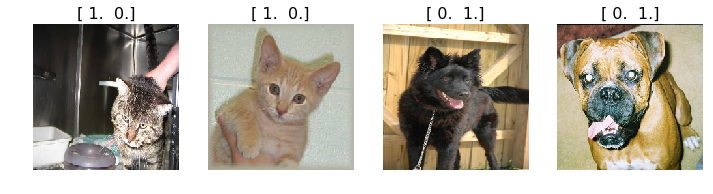

In [9]:

batches = vgg.get_batches(join(PATH, 'train'), batch_size=4)
imgs,labels = next(batches)
plots(imgs, titles=labels)
print("[Cat, Dog]")